In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, ensemble
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from exploration import counterfactuals as cf

PATH = ''

# Example: Growing Spheres for 1 prediction

### 2D Illustrative

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets, ensemble, tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import seaborn as sns

X,y = datasets.make_moons(n_samples = 200, shuffle=True, noise=0.05, random_state=0)
X = (X.copy() - X.mean(axis=0))/X.std(axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#clf = ensemble.RandomForestClassifier(n_estimators=200, max_depth=3)
clf = SVC(gamma=1, probability=True)
#clf = tree.DecisionTreeClassifier(max_depth=6)
clf = clf.fit(X_train, y_train)
print(' ### Accuracy:', sum(clf.predict(X_test) == y_test)/y_test.shape[0])

def plot_classification_contour(X, clf, ax=[0,1]):
    ## Inspired by scikit-learn documentation
    h = .02  # step size in the mesh
    cm = plt.cm.RdBu
    x_min, x_max = X[:, ax[0]].min() - .5, X[:, ax[0]].max() + .5
    y_min, y_max = X[:, ax[1]].min() - .5, X[:, ax[1]].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    #plt.sca(ax)
    plt.contourf(xx, yy, Z, alpha=.5, cmap=cm)


 ### Accuracy: 1.0


==================================================== 0
0 ennemies found in initial sphere. Zooming in...
Exploring...
Final number of iterations:  35
Final radius:  (0.6220000000000002, 0.6400000000000002)
Final number of ennemies:  33
Feature selection...
Reduced 0 coordinates
==================================================== 1
0 ennemies found in initial sphere. Zooming in...
Exploring...
Final number of iterations:  39
Final radius:  (0.6940000000000003, 0.7120000000000003)
Final number of ennemies:  33
Feature selection...
Reduced 0 coordinates
==================================================== 2
0 ennemies found in initial sphere. Zooming in...
Exploring...
Final number of iterations:  45
Final radius:  (0.8020000000000004, 0.8200000000000004)
Final number of ennemies:  56
Feature selection...
Reduced 0 coordinates
==================================================== 3
0 ennemies found in initial sphere. Zooming in...
Exploring...
Final number of iterations:  32
Final radius:

Final number of iterations:  47
Final radius:  (0.8380000000000004, 0.8560000000000004)
Final number of ennemies:  4
Feature selection...
Reduced 0 coordinates
==================================================== 30
0 ennemies found in initial sphere. Zooming in...
Exploring...
Final number of iterations:  33
Final radius:  (0.5860000000000002, 0.6040000000000002)
Final number of ennemies:  47
Feature selection...
Reduced 0 coordinates
==================================================== 31
0 ennemies found in initial sphere. Zooming in...
Exploring...
Final number of iterations:  27
Final radius:  (0.47800000000000015, 0.49600000000000016)
Final number of ennemies:  2
Feature selection...
Reduced 0 coordinates


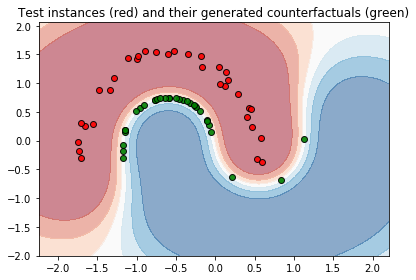

In [5]:
cf_list = []
cnt = 0
X_test_class0 = X_test[np.where(y_test == 0)]
for obs in X_test_class0:
    print('====================================================', cnt)
    CF = cf.CounterfactualExplanation(obs, clf.predict, method='GS')
    CF.fit(n_in_layer=2000, first_radius=0.1, dicrease_radius=10, sparse=True, verbose=True)
    cf_list.append(CF.enemy)
    cnt += 1
cf_list = np.array(cf_list) 

plot_classification_contour(X_test, clf)
plt.scatter(X_test_class0[:, 0], X_test_class0[:, 1], marker='o', edgecolors='k', alpha=0.9, color='red')
plt.scatter(cf_list[:, 0], cf_list[:, 1], marker='o', edgecolors='k', alpha=0.9, color='green')
plt.title('Test instances (red) and their generated counterfactuals (green)')
plt.tight_layout()

# Distance and sparsity over datasets

In [6]:
import numpy as np
import pandas as pd
from sklearn import datasets, ensemble, tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import seaborn as sns
import load_dataset
import xgboost as xgb

#X,y = datasets.make_moons(n_samples = 200, shuffle=True, noise=0.05, random_state=0)

'''BOSTON'''
#X, y = datasets.load_boston(return_X_y=True)
#y = (y >= 21) + 0

'''GERMAN'''
#X, y = load_dataset.main('credit', n_obs=10000)

'''ONLINE NEWS POPULARITY'''
#X, y = load_dataset.main('news', n_obs=10000)
df = pd.read_csv('datasets/newspopularity.csv', header=0, nrows=10000)
y = np.array(df.iloc[:, -1].apply(pd.to_numeric))
y = np.array([int(x>=1400) for x in y])
print(df.iloc[:,2:-1].columns)
X = np.array(df.iloc[:, 2:-1].apply(pd.to_numeric))
#essayer d'enlever valeurs extremes


'''### RECIDIVISM
df = pd.read_csv('/home/laugel/Documents/thesis/code/highgarden/highgarden/datasets/recidivism.csv', sep=',', header=0)
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
#df = df[df['score_text'] != 'Low']
df = df[(df['days_b_screening_arrest'] >= -30) & (df['days_b_screening_arrest']<=30)]
df = df[df['is_recid'] != -1]
#y = df.score_text.astype('category').cat.codes
y = (df.score_text != 'Low').astype('int')
del df['score_text']
del df['decile_score']
del df['violent_recid']
del df['r_days_from_arrest']
del df['id']
del df['decile_score.1']
del df['v_decile_score']
del df['start']
del df['end']
X = df.select_dtypes(include=numerics)
X['race'] = df['race']
X['sex'] = df['sex']
X = pd.get_dummies(X)
del X['race_Caucasian']
del X['sex_Male']
vars_ = X.columns
print(X.head())
X = np.array(X)
'''

X = (X.copy() - X.mean(axis=0))/X.std(axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

print('sùodhmofvmdwoih X_test shape:', X_test.shape)



#clf = ensemble.RandomForestClassifier(n_estimators=200, max_depth=None, n_jobs=-1)
clf = ensemble.AdaBoostClassifier(n_estimators=200, learning_rate=1.0)
#clf = SVC(gamma='auto', probability=True)
clf = clf.fit(X_train, y_train)
print(' ### Accuracy:', sum(clf.predict(X_test) == y_test)/y_test.shape[0])

def plot_classification_contour(X, clf, ax=[0,1]):
    ## Inspired by scikit-learn documentation
    h = .02  # step size in the mesh
    cm = plt.cm.RdBu
    x_min, x_max = X[:, ax[0]].min() - .5, X[:, ax[0]].max() + .5
    y_min, y_max = X[:, ax[1]].min() - .5, X[:, ax[1]].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    #plt.sca(ax)
    plt.contourf(xx, yy, Z, alpha=.5, cmap=cm)

def get_CF_distances(obs, n_in_layer=10000, first_radius=0.1, dicrease_radius=10, sparse=True):
    CF = cf.CounterfactualExplanation(obs, clf.predict, method='GS')
    CF.fit(n_in_layer=n_in_layer, first_radius=first_radius, dicrease_radius=dicrease_radius, sparse=sparse,
           verbose=False)
    out = CF.distances()
    l2, l0 = out['euclidean'], out['sparsity']
    return l2, l0

def get_CF(obs, n_in_layer=2000, first_radius=0.1, dicrease_radius=10, sparse=True):
    CF = cf.CounterfactualExplanation(obs, clf.predict, method='GS')
    CF.fit(n_in_layer=n_in_layer, first_radius=first_radius, dicrease_radius=dicrease_radius, sparse=sparse,
           verbose=False)
    e_tilde = CF.e_star
    e_f = CF.enemy
    return obs, e_tilde, e_f
    
    
def iterate_gs_dataset(n_in_layer=2000, first_radius=0.1, dicrease_radius=10, sparse=True):
    l2_list, l0_list = [], []
    cnt = 0
    for obs in X_test[:10, :]:
        print('====================================================', cnt)
        l2, l0 = get_CF(obs, n_in_layer=n_in_layer, 
                               first_radius=first_radius, 
                               dicrease_radius=dicrease_radius, 
                               sparse=sparse)
        l2_list.append(l2)
        l0_list.append(l0)
        cnt += 1
    return l2_list, l0_list    

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' gl

In [110]:
%%time
idx = 9907
#idx = 9900 with adaboost 3 mais gros deplacemet
#idx 2 pareil avec 2
# idx 9403 interessant 3
# 9907
obs_to_interprete = X[idx]
print(df.iloc[idx, :]['url'])
print(clf.predict(X[idx].reshape(1, -1)))
def get_closest_enemy(obs):
    enemies = X_test[np.where((y_test != clf.predict(obs.reshape(1,-1))) & (y_test == clf.predict(X_test)))]
    idx, dist = metrics.pairwise_distances_argmin_min(obs.reshape(1,-1), enemies)
    return dist

from sklearn import metrics
x, e_tilde, e_f =get_CF(obs_to_interprete, n_in_layer=10000, first_radius=0.1, dicrease_radius=100)

print((e_f - x != 0).sum())

http://mashable.com/2013/07/14/twitter-george-zimmerman/
[1]
2
CPU times: user 2.34 s, sys: 3.99 ms, total: 2.34 s
Wall time: 2.34 s


In [111]:
#vars_ = ['crim', 'zn', 'indus','chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']
vars_ = [' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity']

for k in list(zip(vars_, e_f - x)):
    
    if k[1]!=0:
        print('variable: ', k[0])
        print('initial value:')
        print(df.iloc[idx, :][k[0]])
        print('move:')
        print(k[1] * df[k[0]].std())# + df[k[0]].mean())
print('===================')
print(sorted(list(zip(vars_, e_f - x)), key=lambda x: -abs(x[1])))
        

variable:   self_reference_avg_sharess
initial value:
3200.0
move:
-1065.2374839405682
variable:   avg_negative_polarity
initial value:
-0.483333333333
move:
0.0013660548258429702
[(' self_reference_avg_sharess', -0.04935161180566233), (' avg_negative_polarity', 0.010783920946001002), (' n_tokens_title', 0.0), (' n_tokens_content', 0.0), (' n_unique_tokens', 0.0), (' n_non_stop_words', 0.0), (' n_non_stop_unique_tokens', 0.0), (' num_hrefs', 0.0), (' num_self_hrefs', 0.0), (' num_imgs', 0.0), (' num_videos', 0.0), (' average_token_length', 0.0), (' num_keywords', 0.0), (' data_channel_is_lifestyle', 0.0), (' data_channel_is_entertainment', 0.0), (' data_channel_is_bus', 0.0), (' data_channel_is_socmed', 0.0), (' data_channel_is_tech', 0.0), (' data_channel_is_world', 0.0), (' kw_min_min', 0.0), (' kw_max_min', 0.0), (' kw_avg_min', 0.0), (' kw_min_max', 0.0), (' kw_max_max', 0.0), (' kw_avg_max', 0.0), (' kw_min_avg', 0.0), (' kw_max_avg', 0.0), (' kw_avg_avg', 0.0), (' self_reference_

In [83]:
clf.predict(X[idx].reshape(1, -1))

array([0])

In [5]:
'''%%time
from joblib import Parallel, delayed
cf_xtest = Parallel(n_jobs=8)(delayed(get_CF)(obs, n_in_layer=5000, first_radius=0.1, dicrease_radius=100, sparse=True) for obs in X_test[:10])
cf_xtest = np.array(cf_xtest)

'''

'%%time\nfrom joblib import Parallel, delayed\ncf_xtest = Parallel(n_jobs=8)(delayed(get_CF)(obs, n_in_layer=5000, first_radius=0.1, dicrease_radius=100, sparse=True) for obs in X_test[:10])\ncf_xtest = np.array(cf_xtest)\n\n'

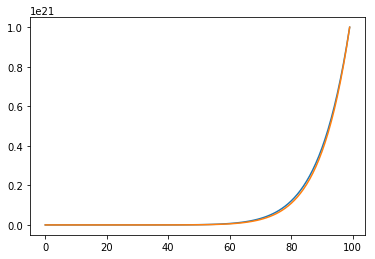

In [34]:
from matplotlib import pyplot as plt
d = 10
def suite(k):
    while k >0:
        return (1.0 + 1.0/k)**d * suite(k -1)
    else:
        return 10

plt.plot([suite(k) for k in range(100)])
plt.plot([(((1 + k)))**(d+0.5) for k in range(0,100)])



# Out of distribution CF

/usr/lib/python3/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(120, 2) (30, 2)


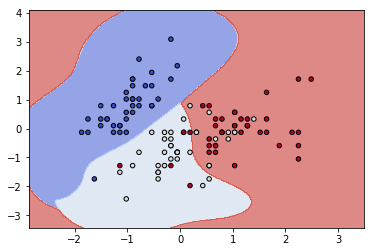

In [64]:
import numpy as np
import pandas as pd
from sklearn import datasets, ensemble
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from exploration import counterfactuals as cf
from sklearn.svm import SVC

PATH = '/home/laugel/Documents/thesis/articles/manuscrit/experiments/figures/'


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def get_CF(obs, n_in_layer=2000, first_radius=0.1, dicrease_radius=10, sparse=True, target_class=None):
    CF = cf.CounterfactualExplanation(obs, clf.predict, method='GS', target_class=target_class)
    CF.fit(n_in_layer=n_in_layer, first_radius=first_radius, dicrease_radius=dicrease_radius, sparse=sparse,
           verbose=False)
    print('target class', CF.target_class)
    e_tilde = CF.e_star
    e_f = CF.enemy
    return obs, e_tilde, e_f
    



# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target
X = (X.copy() - X.mean(axis=0))/X.std(axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
print(X_train.shape, X_test.shape)
clf = SVC(C=1.0, gamma=1.0, probability=True).fit(X_train, y_train)


fig, ax = plt.subplots()

X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.6)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.show()



In [62]:
obs_to_interprete = np.array([-1.1, 2.1])# X_test[2]
_, _, CF = get_CF(obs_to_interprete, n_in_layer=1000, first_radius=0.1, dicrease_radius=100.0, target_class=2)


target class 2


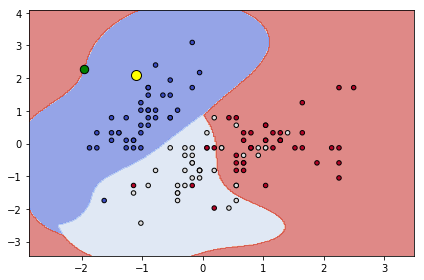

In [65]:

AX1, AX2 = 0, 1
fig, ax = plt.subplots()

X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.6)
#plt.scatter(X_train[:, AX1], X_train[:, AX2], color=[['red', 'blue', 'green'][x] for x in y_train], alpha=0.3, marker='+')
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

ax.scatter(obs_to_interprete[AX1], obs_to_interprete[AX2], color='yellow', s=100, edgecolors='k')
ax.scatter(CF[AX1], CF[AX2], color='green', s=70, edgecolors='k')
fig.tight_layout()
plt.savefig(PATH + 'discussion_iris.pdf', bbox_inches='tight')
plt.show()